# Motivation

##### The motivation for this project stems from the critical need to understand and predict the behavior of atmospheric rivers (ARs) in the context of climate variability, particularly in the western United States. ARs are long, narrow corridors of concentrated moisture in the atmosphere that play a crucial role in transporting water vapor from the tropics to mid-latitudes. While ARs are essential for replenishing water resources and maintaining the water balance in western regions, they can also lead to severe weather events such as heavy rainfall, flooding, and landslides, with significant societal and economic impacts.

##### Climate indices such as the El Niño-Southern Oscillation (ENSO), Pacific Decadal Oscillation (PDO), Arctic Oscillation (AO), and North Atlantic Oscillation (NAO) are known to influence atmospheric circulation patterns and weather systems, including the formation and intensity of ARs. Understanding the relationships between these climate indices and ARs is vital for improving forecasts of AR events, which can help communities better prepare for and mitigate the impacts of extreme weather events associated with ARs.

##### By investigating the influence of climate indices on AR intensity in different latitude ranges of the western United States, this project aims to enhance our understanding of the complex interactions between large-scale climate patterns and regional weather phenomena. Ultimately, this research can contribute to the development of more accurate forecasting models and early warning systems for AR-related hazards, thereby improving resilience and adaptive capacity in vulnerable communities. I hypothesize that climate oscillations closer to the arctic have a greater influence on atmophseric river intensity at higher latitudes and climate oscillations closer to the tropics will have a greater influence on atmospheric river intensity at lower latitudes on western North America.

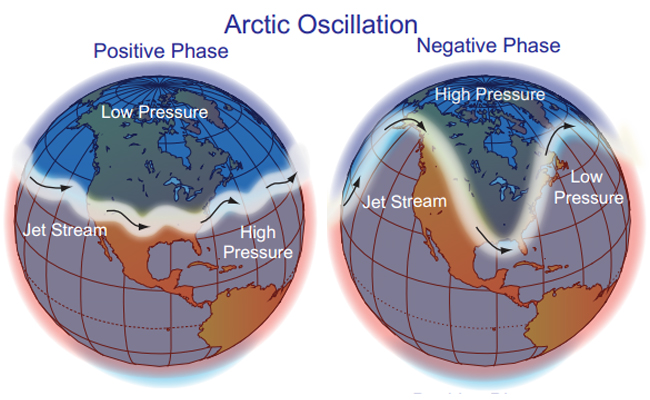

In [1]:
from IPython.display import Image
Image(filename='C:\\Users\\brand\\Documents\\School Files\\Illinois Courses\\ATMS_523\\Module8_Project\\Arctic Oscillation Image.png', width=700, height=700)


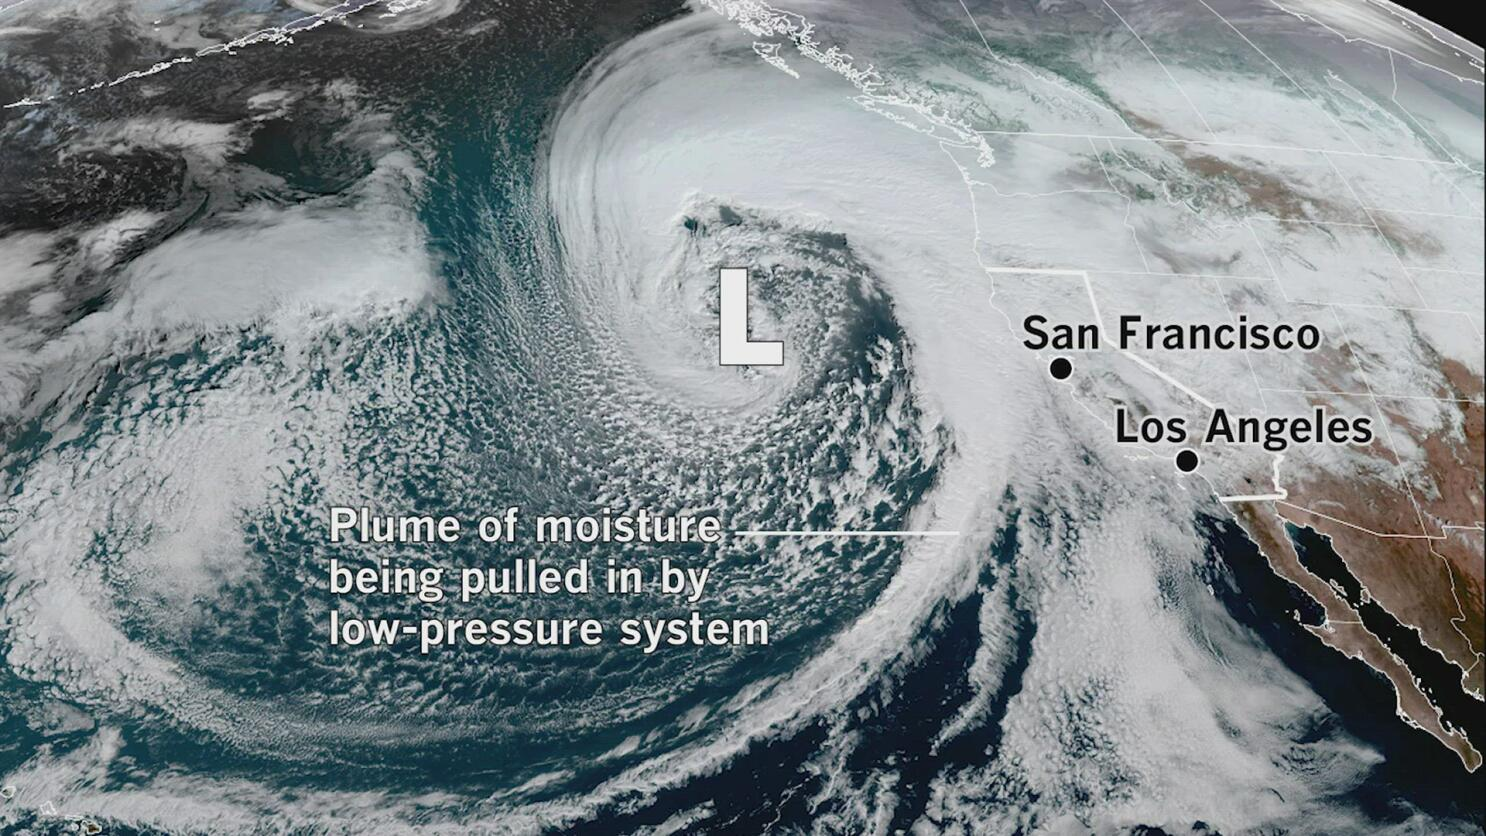

In [2]:
from IPython.display import Image
Image(filename='C:\\Users\\brand\\Documents\\School Files\\Illinois Courses\\ATMS_523\\Module8_Project\\Atmospheric River Image.jpg', width=700, height=700)

In [3]:
# Import Dask so we can run it faster

from dask.distributed import Client, progress
client = Client(dashboard_address=':5555')  # set up local cluster on your laptop
client

c:\Users\brand\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 5555 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52767 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:52767/status,
Dashboard: http://127.0.0.1:52767/status,Workers: 4
Total threads: 12,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52768,Workers: 4
Dashboard: http://127.0.0.1:52767/status,Total threads: 12
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:52789,Total threads: 3
Dashboard: http://127.0.0.1:52790/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:52771,


# Datasets

##### I am using seasonally averaged variables from the NCEP reanalysis with specified teleconnection and ocean index time-series from the NOAA Phyiscal  Sciencies Laboratory to gather my climate indice observations. For the atmospheric rivers I am using a seven-decade-long catalog of atmospheric rivers (ARs) making landfall along the North American west coast based on NCEP Reanalysis from Scripps Institute of Oceanography. Both date ranges are from 1950-2022.

In [4]:
import pandas as pd
import xarray as xr

# Load the Atmospheric River Dataset
ar_data = pd.read_csv('ARcatalog_NCEP_NEW_1948-2018_Comprehensive_FINAL_29JAN18.csv')

# Drop the 'Day', and 'Hour' columns
ar_data = ar_data.drop(columns=['Day', 'Hour'])


In [5]:
ar_data

,AR ID,Year,Month,Coastal latitude of the landfalling AR (at AR center),Coastal longitude of the landfalling AR,IVT at landfall grid point,IWTv at landfall grid point,UVTu at landfall grid point,IWV,U component of wind over the landfall grid point,V component of wind over the landfall grid point
0,1,1948,1,45.0,237.5,303.99,196.81,231.68,18.5,9.7,13.8
1,1,1948,1,45.0,237.5,391.80,173.14,351.47,19.9,14.1,10.1
2,1,1948,1,40.0,237.5,275.59,121.87,247.18,17.3,9.1,8.6
3,1,1948,1,40.0,237.5,275.45,88.27,260.92,17.4,10.7,5.5
4,1,1948,1,40.0,237.5,385.87,134.17,361.80,18.5,10.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...
35149,4247,2018,1,45.0,237.5,593.42,486.67,339.56,21.0,9.5,18.9
35150,4247,2018,1,42.5,237.5,567.12,464.39,325.53,19.6,7.8,13.0
35151,4247,2018,1,42.5,237.5,501.46,386.32,319.71,16.7,9.4,11.4
35152,4247,2018,1,40.0,237.5,383.39,297.13,242.28,16.2,5.3,8.4


In [6]:
# Read in ENSO, PDO, NAO, and AO dataframes.

enso = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/censo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=2, engine='python')
pdo = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/pdo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=14, engine='python')
nao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/nao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')
ao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/ao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')

In [7]:
enso

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1948,0.26,0.43,0.72,0.21,0.24,0.41,0.08,0.26,0.45,-0.64,-0.21,0.58
1,1949,0.18,0.13,-0.55,0.15,0.43,0.00,-0.06,0.08,-0.42,-0.59,-0.29,-0.91
2,1950,-0.74,-1.70,-1.43,-1.29,-1.22,-1.69,-1.69,-0.96,-0.95,-1.27,-1.12,-1.61
3,1951,-1.13,-0.69,-0.24,0.33,0.71,0.19,1.32,1.01,1.10,1.15,0.92,0.83
4,1952,0.64,0.56,0.07,0.71,-0.50,-0.74,-0.54,-0.12,-0.03,-0.06,-0.02,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2019,0.43,1.58,0.90,0.65,1.19,0.90,0.86,0.26,1.00,0.64,1.07,0.71
72,2020,0.18,0.25,0.42,0.35,-0.40,0.07,-0.26,-1.19,-1.03,-1.03,-1.08,-1.83
73,2021,-1.86,-1.84,-0.63,-0.59,-0.52,-0.15,-1.05,-0.62,-0.69,-1.00,-1.14,-1.61
74,2022,-0.75,-1.37,-1.79,-1.76,-1.98,-1.41,-0.95,-1.45,-1.79,-1.78,-0.63,-1.97


In [8]:
import pandas as pd
import xarray as xr
import numpy as np



# Rename the 0th column to 'yr' for all dataframes
enso.rename(columns={0: 'yr'}, inplace=True)
nao.rename(columns={0: 'yr'}, inplace=True)
pdo.rename(columns={0: 'yr'}, inplace=True)
ao.rename(columns={0: 'yr'}, inplace=True)

# Stack the dataframes to convert them to one column for all dataframes
enso_stacked = enso.melt(id_vars=['yr'], value_vars=enso.columns[1:], var_name='month', value_name='enso') # Use melt to accomplish this
nao_stacked = nao.melt(id_vars=['yr'], value_vars=nao.columns[1:], var_name='month', value_name='nao')
pdo_stacked = pdo.melt(id_vars=['yr'], value_vars=pdo.columns[1:], var_name='month', value_name='pdo')
ao_stacked = ao.melt(id_vars=['yr'], value_vars=ao.columns[1:], var_name='month', value_name='ao')


In [9]:
# Filter dataframes to include only the common date range (1950 to 2022)
enso = enso[(enso['yr'] >= 1950) & (enso['yr'] <= 2022)]
nao = nao[(nao['yr'] >= 1950) & (nao['yr'] <= 2022)]
pdo = pdo[(pdo['yr'] >= 1950) & (pdo['yr'] <= 2022)]
ao = ao[(ao['yr'] >= 1950) & (ao['yr'] <= 2022)]

# Stack the dataframes to convert them to one column for all dataframes
enso = enso.melt(id_vars=['yr'], value_vars=enso.columns[1:], var_name='month', value_name='enso')
nao = nao.melt(id_vars=['yr'], value_vars=nao.columns[1:], var_name='month', value_name='nao')
pdo = pdo.melt(id_vars=['yr'], value_vars=pdo.columns[1:], var_name='month', value_name='pdo')
ao = ao.melt(id_vars=['yr'], value_vars=ao.columns[1:], var_name='month', value_name='ao')

In [10]:
# Merge all four datasets
merged_data = pd.merge(enso_stacked, nao_stacked, on=['yr', 'month'], how='outer')
merged_data = pd.merge(merged_data, pdo_stacked, on=['yr', 'month'], how='outer')
merged_data = pd.merge(merged_data, ao_stacked, on=['yr', 'month'], how='outer')

In [11]:
merged_data

,yr,month,enso,nao,pdo,ao
0,1948,1,0.26,-99.90,-0.11,NaN
1,1949,1,0.18,-99.90,-2.01,NaN
2,1950,1,-0.74,0.56,-2.13,-0.060
3,1951,1,-1.13,-0.42,-1.54,-0.085
4,1952,1,0.64,0.57,-2.01,0.368
...,...,...,...,...,...,...
919,2024,8,NaN,-99.90,NaN,-999.000
920,2024,9,NaN,-99.90,NaN,-999.000
921,2024,10,NaN,-99.90,NaN,-999.000
922,2024,11,NaN,-99.90,NaN,-999.000


In [12]:
# Rename columns 'yr' and 'month' to 'Year' and 'Month' to match the AR dataaset
merged_data.rename(columns={'yr': 'Year', 'month': 'Month'}, inplace=True)

merged_data


,Year,Month,enso,nao,pdo,ao
0,1948,1,0.26,-99.90,-0.11,NaN
1,1949,1,0.18,-99.90,-2.01,NaN
2,1950,1,-0.74,0.56,-2.13,-0.060
3,1951,1,-1.13,-0.42,-1.54,-0.085
4,1952,1,0.64,0.57,-2.01,0.368
...,...,...,...,...,...,...
919,2024,8,NaN,-99.90,NaN,-999.000
920,2024,9,NaN,-99.90,NaN,-999.000
921,2024,10,NaN,-99.90,NaN,-999.000
922,2024,11,NaN,-99.90,NaN,-999.000


In [13]:
ar_data

,AR ID,Year,Month,Coastal latitude of the landfalling AR (at AR center),Coastal longitude of the landfalling AR,IVT at landfall grid point,IWTv at landfall grid point,UVTu at landfall grid point,IWV,U component of wind over the landfall grid point,V component of wind over the landfall grid point
0,1,1948,1,45.0,237.5,303.99,196.81,231.68,18.5,9.7,13.8
1,1,1948,1,45.0,237.5,391.80,173.14,351.47,19.9,14.1,10.1
2,1,1948,1,40.0,237.5,275.59,121.87,247.18,17.3,9.1,8.6
3,1,1948,1,40.0,237.5,275.45,88.27,260.92,17.4,10.7,5.5
4,1,1948,1,40.0,237.5,385.87,134.17,361.80,18.5,10.8,6.4
...,...,...,...,...,...,...,...,...,...,...,...
35149,4247,2018,1,45.0,237.5,593.42,486.67,339.56,21.0,9.5,18.9
35150,4247,2018,1,42.5,237.5,567.12,464.39,325.53,19.6,7.8,13.0
35151,4247,2018,1,42.5,237.5,501.46,386.32,319.71,16.7,9.4,11.4
35152,4247,2018,1,40.0,237.5,383.39,297.13,242.28,16.2,5.3,8.4


In [14]:
# Group by 'Year' and 'Month' and calculate the mean of each variable so that year and month can match the climate indices.
ar_monthly_means = ar_data.groupby(['Year', 'Month']).mean().reset_index()

# Display the resulting dataset
ar_monthly_means.head(20)


,Year,Month,AR ID,Coastal latitude of the landfalling AR (at AR center),Coastal longitude of the landfalling AR,IVT at landfall grid point,IWTv at landfall grid point,UVTu at landfall grid point,IWV,U component of wind over the landfall grid point,V component of wind over the landfall grid point
0,1948,1,1.756098,45.487805,235.853659,411.136585,163.040488,343.332683,20.321951,10.387805,8.378049
1,1948,2,4.687500,32.656250,246.406250,458.570000,141.855625,413.629687,23.618750,9.478125,3.384375
2,1948,3,9.789474,35.592105,242.236842,386.089737,107.580000,333.544737,20.836842,8.034211,4.576316
3,1948,4,14.000000,33.829787,241.755319,391.197660,45.885957,333.690638,22.831915,7.946809,0.963830
4,1948,5,19.269231,46.826923,234.615385,319.952308,197.808077,206.011538,22.765385,4.853846,5.469231
5,1948,6,22.928571,47.410714,234.196429,350.803929,-36.627857,268.433571,26.903571,4.914286,-1.132143
6,1948,7,25.785714,53.392857,230.803571,339.364286,129.467143,248.702500,25.164286,6.292857,3.889286
7,1948,8,28.171429,52.071429,232.428571,441.389714,187.974571,340.278286,26.691429,7.982857,6.254286
8,1948,9,30.937500,52.890625,231.328125,441.146406,289.996562,307.536250,25.820312,6.821875,9.073438
9,1948,10,37.730337,48.314607,233.960674,388.617640,262.612472,184.655281,21.535955,3.851685,10.220225


In [15]:
# Merge the atmospheric river dataset with the merged dataset based on the common 'Year' and 'Month' columns
final_dataset = pd.merge(merged_data, ar_monthly_means, on=['Year', 'Month'], how='left')

In [16]:
final_dataset.head(10)

,Year,Month,enso,nao,pdo,ao,AR ID,Coastal latitude of the landfalling AR (at AR center),Coastal longitude of the landfalling AR,IVT at landfall grid point,IWTv at landfall grid point,UVTu at landfall grid point,IWV,U component of wind over the landfall grid point,V component of wind over the landfall grid point
0,1948,1,0.26,-99.90,-0.11,NaN,1.756098,45.487805,235.853659,411.136585,163.040488,343.332683,20.321951,10.387805,8.378049
1,1949,1,0.18,-99.90,-2.01,NaN,56.935484,37.217742,242.741935,403.270000,226.326129,317.856613,23.617742,8.633871,6.800000
2,1950,1,-0.74,0.56,-2.13,-0.060,114.753247,34.188312,243.084416,389.431169,141.659481,335.447792,23.511688,8.157143,4.127273
3,1951,1,-1.13,-0.42,-1.54,-0.085,177.226415,40.330189,238.962264,424.081698,132.326792,382.669811,20.273585,10.594340,6.643396
4,1952,1,0.64,0.57,-2.01,0.368,238.530120,33.253012,243.855422,402.754699,247.041446,298.084940,25.436145,6.284337,7.114458
5,1953,1,0.18,-0.12,-0.57,-1.036,301.881579,41.973684,237.960526,484.010789,216.269737,406.146579,22.313158,11.765789,9.485526
6,1954,1,0.00,-0.08,-1.32,-0.148,374.722222,37.812500,240.555556,423.194028,224.796667,333.587500,21.326389,9.461111,8.972222
7,1955,1,-0.01,-2.65,0.20,-1.163,433.000000,33.854167,245.260417,433.549375,302.429167,271.132292,23.516667,5.302083,8.062500
8,1956,1,-1.10,-0.76,-2.48,-1.204,487.666667,36.992754,239.166667,420.319565,120.430870,333.258116,23.724638,8.240580,4.889855
9,1957,1,-0.44,0.71,-1.82,2.062,550.054795,31.472603,245.376712,423.797397,177.882329,355.211781,29.250685,8.321918,3.508219


In [17]:
# Drop rows with NaN values
final_dataset.dropna(inplace=True)

In [18]:
# Define latitude ranges for the subsections
latitude_ranges = [(30, 40), (40, 50), (50, 60)]  # Example latitude ranges (adjust as needed)

# Create a list to store subsets
subsets = []

# Subset the data based on latitude ranges
for i, (lat_min, lat_max) in enumerate(latitude_ranges):
    subset = final_dataset[(final_dataset['Coastal latitude of the landfalling AR (at AR center)'] >= lat_min) & 
                           (final_dataset['Coastal latitude of the landfalling AR (at AR center)'] < lat_max)].reset_index(drop=True)
    subsets.append(subset)

# Assign meaningful names to the subsets
subset_names = ['Latitude_30_40', 'Latitude_40_50', 'Latitude_50_60']

# Create dictionaries to store datasets
datasets = {}

# Store datasets with meaningful names
for name, subset in zip(subset_names, subsets):
    datasets[name] = subset

# Print the names of the datasets
print("Names of the datasets:")
for name in subset_names:
    print(name)


Names of the datasets:
Latitude_30_40
Latitude_40_50
Latitude_50_60


In [19]:
# Access the dataset for the latitude range 30-40
lat_30_40 = datasets['Latitude_30_40']

# Access the dataset for the latitude range 40-50
lat_40_50 = datasets['Latitude_40_50']

# Access the dataset for the latitude range 50-60
lat_50_60 = datasets['Latitude_50_60']

In [20]:
lat_50_60

,Year,Month,enso,nao,pdo,ao,AR ID,Coastal latitude of the landfalling AR (at AR center),Coastal longitude of the landfalling AR,IVT at landfall grid point,IWTv at landfall grid point,UVTu at landfall grid point,IWV,U component of wind over the landfall grid point,V component of wind over the landfall grid point
0,2004,3,-0.07,0.67,0.61,0.318,3365.764706,51.470588,233.529412,407.270000,241.979412,240.349412,18.325882,6.729412,12.182353
1,1977,4,0.33,0.56,0.30,1.329,1720.000000,52.083333,232.361111,326.991111,219.361111,81.858889,16.938889,1.555556,10.566667
2,1994,4,1.10,1.10,1.05,0.225,2757.000000,52.000000,233.000000,319.974000,272.986000,163.162000,16.460000,4.960000,14.040000
3,2004,4,0.55,1.11,0.57,-0.409,3368.692308,55.384615,228.461538,343.418462,282.943846,131.886923,18.810769,2.123077,12.753846
4,2008,4,-0.85,-1.31,-1.52,-0.455,3632.916667,50.208333,231.875000,371.128333,290.205833,123.147500,19.084167,2.350000,13.925000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2013,10,-0.02,-0.88,-0.87,0.263,3966.719298,50.789474,231.710526,393.158596,249.146667,271.497895,25.854386,5.701754,9.008772
143,2017,10,-0.90,0.71,0.05,0.690,4230.611111,51.319444,232.118056,479.847361,165.024306,398.660833,23.504167,10.052778,6.884722
144,1956,11,-0.56,0.40,-2.11,-0.066,540.544304,52.753165,230.411392,438.459367,280.608608,283.928481,22.025316,7.816456,11.891139
145,1999,12,-1.47,1.40,-1.63,1.043,3105.295455,51.590909,231.647727,413.961591,213.297273,290.482955,19.277273,8.900000,11.297727


Latitude dataset: Latitude_30_40
RMSE: 56.73503926046514
Correlation coefficient: -0.39139322944506105


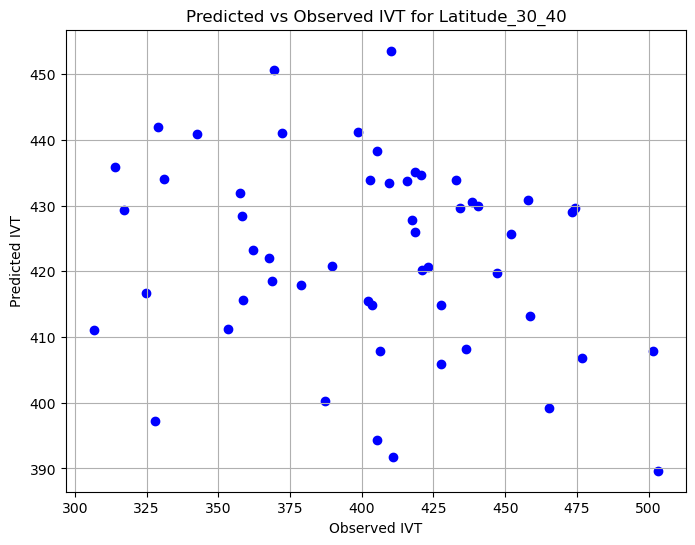

Latitude dataset: Latitude_40_50
RMSE: 47.447515283401515
Correlation coefficient: -0.2080348295944412


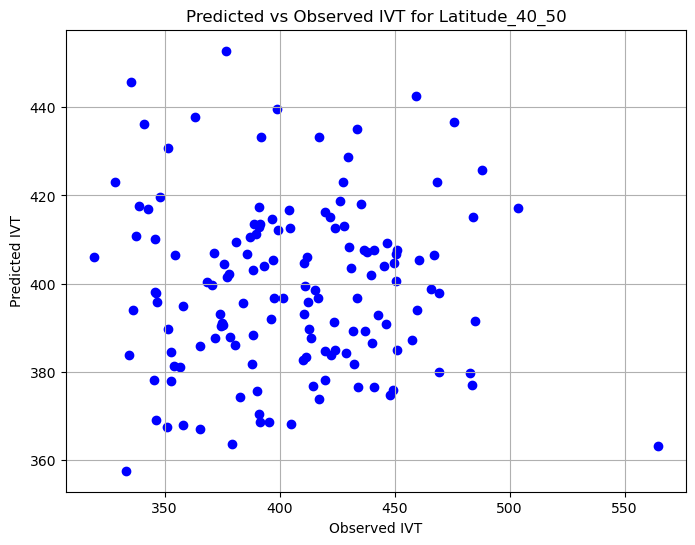

Latitude dataset: Latitude_50_60
RMSE: 55.25000188884584
Correlation coefficient: -0.17901616602568526


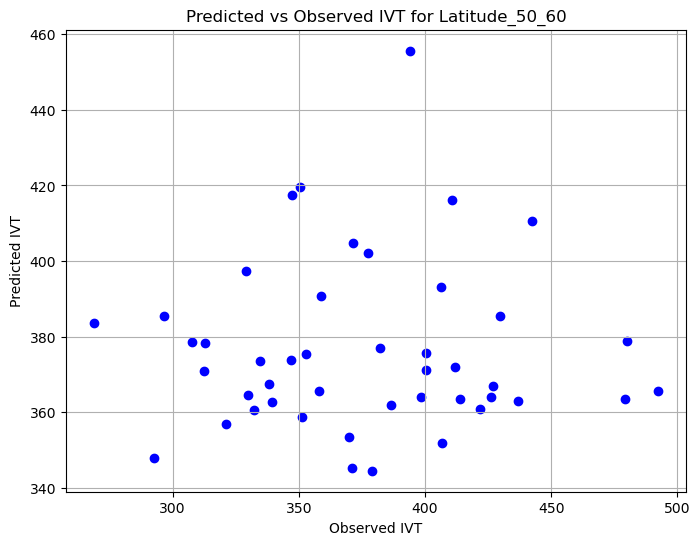

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define latitude ranges
latitude_ranges = {
    "Latitude_30_40": (30, 40),
    "Latitude_40_50": (40, 50),
    "Latitude_50_60": (50, 60)
}

# Create empty dictionaries to store latitude subsets
latitude_datasets = {}

# Loop over latitude ranges
for name, (min_lat, max_lat) in latitude_ranges.items():
    # Subset the final dataset by latitude
    latitude_datasets[name] = final_dataset[
        (final_dataset['Coastal latitude of the landfalling AR (at AR center)'] >= min_lat) &
        (final_dataset['Coastal latitude of the landfalling AR (at AR center)'] < max_lat)
    ]

# Loop over each latitude dataset
for name, dataset in latitude_datasets.items():
    print("Latitude dataset:", name)
    
    # Prepare feature matrix (X) and target vector (y)
    X = dataset[['enso', 'nao', 'pdo', 'ao']]
    y = dataset['IVT at landfall grid point']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    corr_coef = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("RMSE:", rmse)
    print("Correlation coefficient:", corr_coef)

    # Plot scatter plot of predicted versus observed IVT values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.title("Predicted vs Observed IVT for " + name)
    plt.xlabel("Observed IVT")
    plt.ylabel("Predicted IVT")
    plt.grid(True)
    plt.show()



Latitude dataset: Latitude_30_40
enso: 0.3599294489209918
nao: 0.2003313353202635
pdo: 0.23472638795067322
ao: 0.20501282780807153


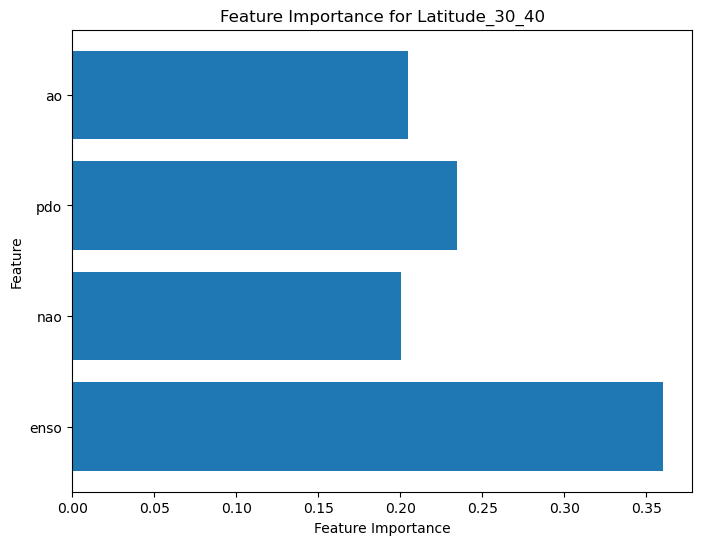


Latitude dataset: Latitude_40_50
enso: 0.2176344819253168
nao: 0.24144541668597935
pdo: 0.2614276372179475
ao: 0.2794924641707564


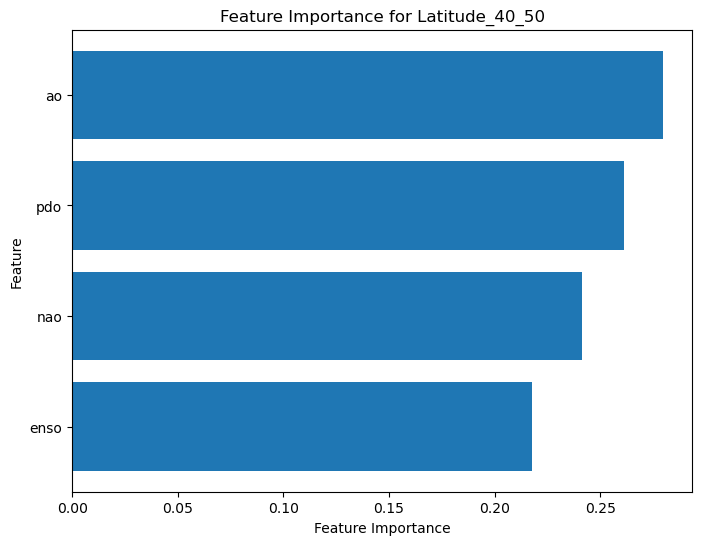


Latitude dataset: Latitude_50_60
enso: 0.17854578013382139
nao: 0.22612395238626143
pdo: 0.3251723680542098
ao: 0.2701578994257074


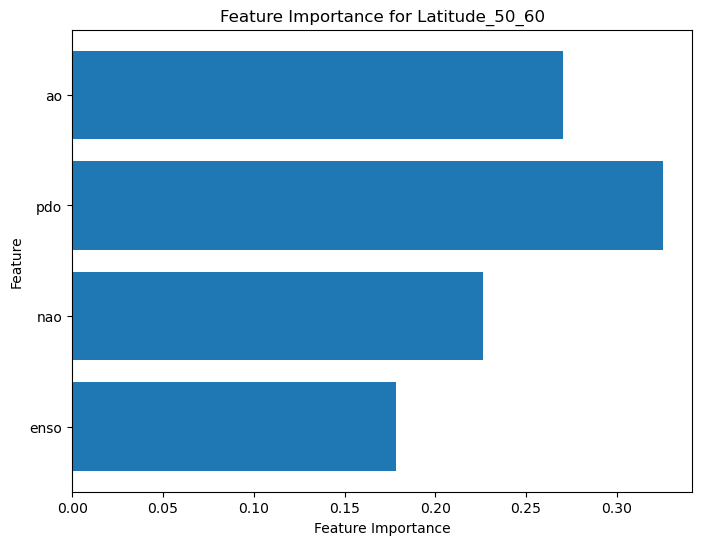

In [22]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define a function to calculate feature importance
def calculate_feature_importance(X_train, y_train):
    # Initialize Random Forest regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf.fit(X_train, y_train)

    # Get feature importances
    importances = rf.feature_importances_
    
    return importances

# Define a function to plot feature importances
def plot_feature_importance(importances, features, title):
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(features)), importances, align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Loop over each latitude dataset
for name, dataset in latitude_datasets.items():
    print("Latitude dataset:", name)
    
    # Prepare feature matrix (X) and target vector (y)
    X = dataset[['enso', 'nao', 'pdo', 'ao']]
    y = dataset['IVT at landfall grid point']

    # Split the data into training and testing sets
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform feature importance analysis
    feature_importances = calculate_feature_importance(X_train, y_train)
    
    # Print feature importances
    for feature, importance in zip(X.columns, feature_importances):
        print(f"{feature}: {importance}")
    
    # Plot feature importances
    plot_feature_importance(feature_importances, X.columns, f"Feature Importance for {name}")
    
    print()  # Add an empty line for readability


#####  In feature importance analysis, the goal is to identify which input variables (in this case, the 4 climate indices: ENSO, NAO, PDO, and AO) contribute most significantly to predicting IVT. When ENSO, NAO, PDO, and AO are used as input features in a model to predict IVT, feature importance analysis quantifies the influence of each variable on the model's predictive performance. Higher feature importance values indicate stronger contributions to the model's ability to predict IVT. Therefore, when ENSO, for example, has a high feature importance value in the analysis, it suggests that variations in ENSO strongly correlate with changes in IVT levels associated with atmospheric river events. Similarly, lower feature importance values for other variables indicate relatively weaker contributions to the model's predictive performance for IVT.

##### In the latitude range of 30-40 degrees, the feature importance analysis indicates that ENSO (El Niño-Southern Oscillation) is the most influential factor for predicting IVT (Integrated Vapor Transport), with a feature importance score of 0.35. In the 40-50 degree latitude band, AO (Arctic Oscillation) emerges as the dominant feature, suggesting its significant impact on IVT variations in that region. Conversely, for latitudes 50-60 degrees, PDO (Pacific Decadal Oscillation) stands out as the primary driver of IVT, reflecting its pronounced influence on atmospheric river dynamics in that specific latitude range.

###

Latitude dataset: Latitude_30_40


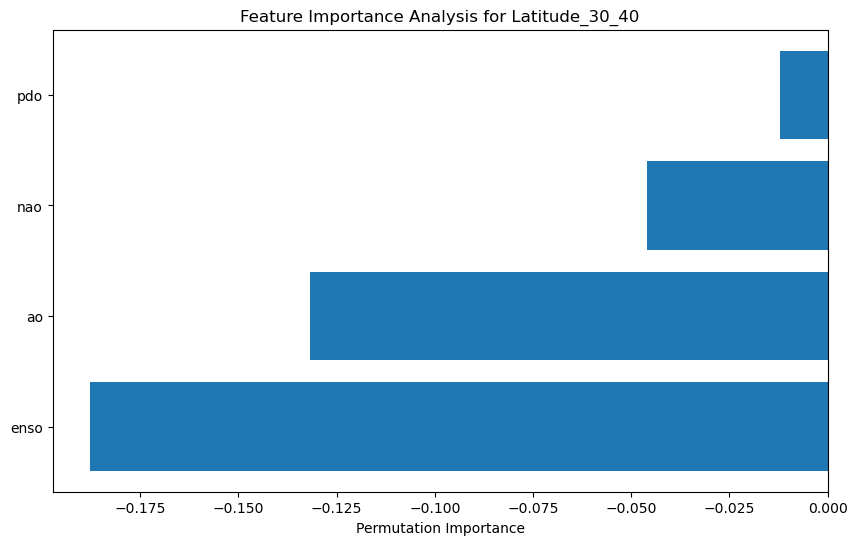

Feature: enso
Mean Permutation Importance: -0.18790184988418246
Mean Permutation Importance Std: 0.08681555373352337

Feature: nao
Mean Permutation Importance: -0.0458860968849387
Mean Permutation Importance Std: 0.0378752719255429

Feature: pdo
Mean Permutation Importance: -0.012019442433472239
Mean Permutation Importance Std: 0.03258611523801866

Feature: ao
Mean Permutation Importance: -0.1318339521440974
Mean Permutation Importance Std: 0.04890595062967136

Latitude dataset: Latitude_40_50


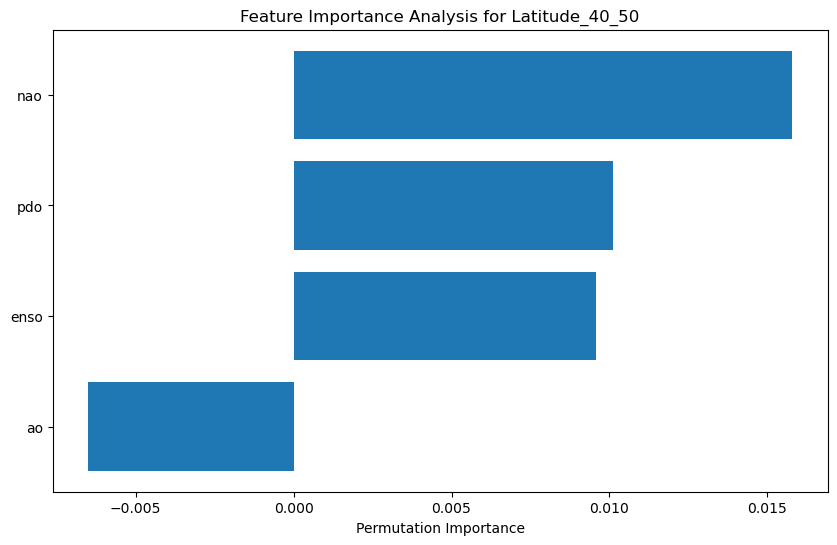

Feature: enso
Mean Permutation Importance: 0.00958405009188774
Mean Permutation Importance Std: 0.06326068752444428

Feature: nao
Mean Permutation Importance: 0.015789598883841304
Mean Permutation Importance Std: 0.027470113062204173

Feature: pdo
Mean Permutation Importance: 0.010121087261119443
Mean Permutation Importance Std: 0.04538422472790973

Feature: ao
Mean Permutation Importance: -0.00651544802616868
Mean Permutation Importance Std: 0.06541670340717716

Latitude dataset: Latitude_50_60


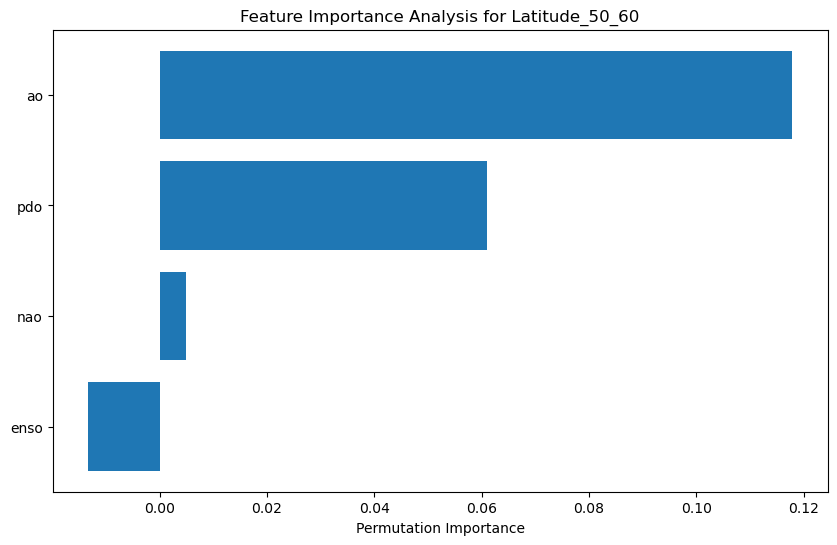

Feature: enso
Mean Permutation Importance: -0.013394138560737168
Mean Permutation Importance Std: 0.02471860294663185

Feature: nao
Mean Permutation Importance: 0.0049676302318213406
Mean Permutation Importance Std: 0.05036063680992802

Feature: pdo
Mean Permutation Importance: 0.06100409896030192
Mean Permutation Importance Std: 0.10062955962754881

Feature: ao
Mean Permutation Importance: 0.11790930984657837
Mean Permutation Importance Std: 0.11528192655366201



In [23]:
from sklearn.inspection import permutation_importance

# Loop over each latitude dataset
for name, dataset in latitude_datasets.items():
    print("Latitude dataset:", name)
    
    # Prepare feature matrix (X) and target vector (y)
    X = dataset[['enso', 'nao', 'pdo', 'ao']]
    y = dataset['IVT at landfall grid point']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Perform permutation importance analysis
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Get sorted indices of feature importance
    sorted_idx = result.importances_mean.argsort()

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance Analysis for {name}')
    plt.show()

    # Perform multipass permutation analysis
    for i in range(len(X.columns)):
        print(f"Feature: {X.columns[i]}")
        print(f"Mean Permutation Importance: {result.importances_mean[i]}")
        print(f"Mean Permutation Importance Std: {result.importances_std[i]}")
        print()


##### Permutation importance helps us understand which factors, like ENSO, NAO, PDO, and AO, are most important for predicting the intensity of atmospheric rivers. It does this by checking how much the accuracy of our predictions drops when we shuffle the values of each factor randomly. If shuffling the values of ENSO causes a big drop in prediction accuracy, it means ENSO is crucial for making accurate predictions. Similarly, if shuffling other factors doesn't affect prediction accuracy much, they might not be as important. So, permutation importance helps us figure out which factors matter most when predicting atmospheric river intensity.

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Latitude dataset: Latitude_30_40


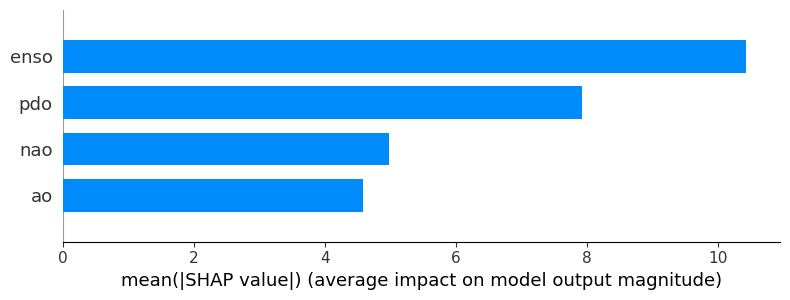

Latitude dataset: Latitude_40_50


 95%|=================== | 454/478 [00:13<00:00]       

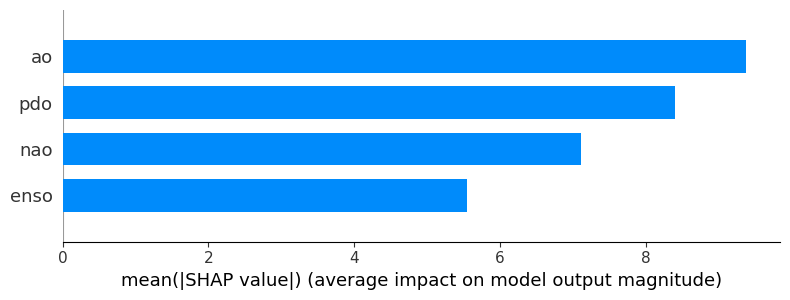

Latitude dataset: Latitude_50_60


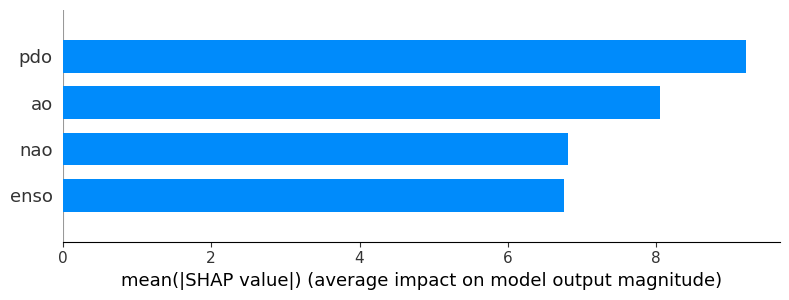

In [24]:
import shap

# Loop over each latitude dataset
for name, dataset in latitude_datasets.items():
    print("Latitude dataset:", name)
    
    # Prepare feature matrix (X) and target vector (y)
    X = dataset[['enso', 'nao', 'pdo', 'ao']]
    y = dataset['IVT at landfall grid point']

    # Initialize RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    
    # Train the model
    model.fit(X, y)
    
    # Create a SHAP explainer
    explainer = shap.Explainer(model, X)

    # Calculate SHAP values
    shap_values = explainer(X)

    # Plot SHAP summary plot
    shap.summary_plot(shap_values, X, plot_type="bar", title=f"SHAP Summary Plot for {name}")



##### SHAP (SHapley Additive exPlanations) analysis is a method used to explain individual predictions in machine learning models. It quantifies the contribution of each feature to the model's prediction for a particular instance. Imagine you have a black box model that predicts atmospheric river intensity based on various factors like ENSO, NAO, PDO, AO, etc. SHAP analysis helps to open this black box by attributing each prediction to different features. For example, it might tell us that a particular prediction was heavily influenced by a positive ENSO value and a negative NAO value, which increased the predicted intensity of the atmospheric river. This allows us to understand the underlying logic of the model's predictions and identify which factors are most influential in driving atmospheric river intensity.

#### In addition to the feature importance analysis, permutation importance and SHAP analysis were conducted for each latitude range. Consistently across all analyses, ENSO, AO, and PDO emerged as dominant factors influencing IVT variations in their respective latitude bands. Specifically, in the 30-40 degree latitude range, ENSO exhibited the highest importance, followed by AO in the 40-50 degree range, and PDO in the 50-60 degree range. These results underscore the significant roles of these climate indices in shaping atmospheric river activity across different latitudinal zones.

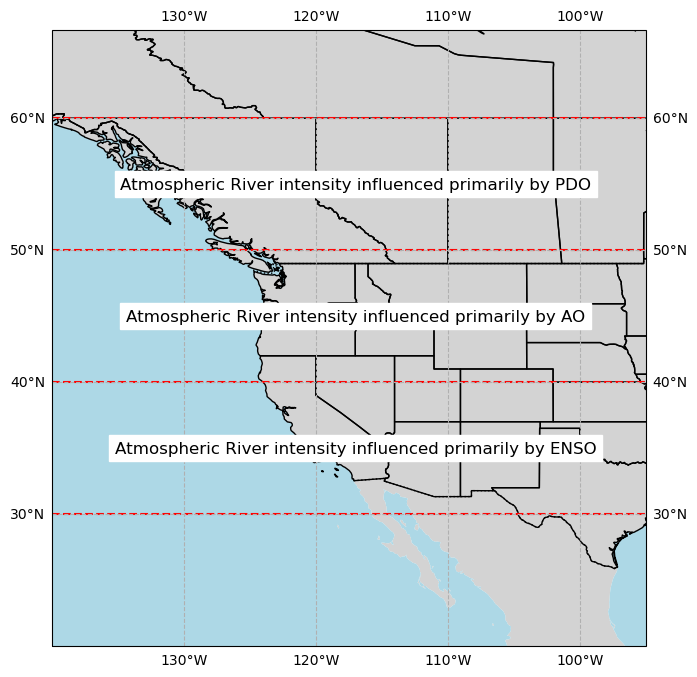

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')

# Set extent to show more of the Pacific Ocean and Western United States
ax.set_extent([-140, -95, 20, 65])

# Draw latitude lines
for lat in [30, 40, 50, 60]:
    ax.axhline(lat, color='red', linestyle='--')


# Add gridlines
ax.gridlines(draw_labels=True, linestyle='--')

# Add text annotations
ax.text(-117, 35, "Atmospheric River intensity influenced primarily by ENSO", fontsize=12, color='black', ha='center', va='center', backgroundcolor = 'white')
ax.text(-117, 45, "Atmospheric River intensity influenced primarily by AO", fontsize=12, color='black', ha='center', va='center', backgroundcolor = 'white')
ax.text(-117, 55, "Atmospheric River intensity influenced primarily by PDO", fontsize=12, color='black', ha='center', va='center', backgroundcolor = 'white')

# Show plot
plt.show()

# Discussion and Conclusion

##### In different latitude ranges, specific climate indices can exert varying degrees of influence on atmospheric river intensity. In the latitude range of 30-40 degrees, encompassing regions like California and the southwestern United States, the El Niño-Southern Oscillation (ENSO) appears to have the highest feature importance. ENSO is a climate pattern characterized by fluctuations in sea surface temperatures and atmospheric pressure in the equatorial Pacific Ocean. During El Niño events, warmer-than-average sea surface temperatures in the eastern Pacific can lead to enhanced moisture transport and storminess, contributing to stronger atmospheric rivers in this region. Moving to the 40-50 degrees latitude range, which includes areas like the Pacific Northwest, the Arctic Oscillation (AO) appears to emerge as the dominant factor influencing atmospheric river intensity. The AO is a climate pattern characterized by fluctuations in atmospheric pressure between the polar and mid-latitudes of the Northern Hemisphere. In its positive phase, the AO can lead to changes in the position and strength of the jet stream, affecting atmospheric circulation patterns and moisture transport, thereby influencing atmospheric river behavior. Finally, in the 50-60 degrees latitude range, encompassing higher latitudes like Alaska and northern Canada, the Pacific Decadal Oscillation (PDO) appears to exhibit the highest feature importance. The PDO is a long-term climate pattern characterized by fluctuations in sea surface temperatures in the North Pacific Ocean. During its positive phase, the PDO can lead to changes in atmospheric circulation patterns, resulting in enhanced moisture transport and storminess along the west coast of North America, ultimately impacting the intensity and frequency of atmospheric rivers in this region.